# Customer Churn Prediction - Telecommunications Dataset from Kaggle

## 1.) Problem Description 

### 1.1) Customer churn
- Customer churn is a term used when a customer decides to stop using the services of the business.
- We need to use the available data to train machine learning model of high accuracy that will predict which customers are about to churn, which will enable the primary stakeholders in making useful marketing decisions.
- The dataset and competition information is available here: https://www.kaggle.com/c/customer-churn-prediction-2020/overview 

### 1.2) Data overview:
The training dataset contains 4250 samples. Each sample contains 19 features and 1 boolean variable "churn" which indicates the class of the sample. The 19 input features and 1 target variable are:

- "state", string. 2-letter code of the US state of customer residence 
- "account_length", numerical. Number of months the customer has been with the current telco provider
- "area_code", string = "area_code_AAA" where AAA = 3 digit area code.
- "international_plan", . The customer has international plan.
- "voice_mail_plan", . The customer has voice mail plan.
- "number_vmail_messages", numerical. Number of voice-mail messages.
- "total_day_minutes", numerical. Total minutes of day calls.
- "total_day_calls", numerical. Total minutes of day calls.
- "total_day_charge", numerical. Total charge of day calls.
- "total_eve_minutes", numerical. Total minutes of evening calls.
- "total_eve_calls", numerical. Total number of evening calls.
- "total_eve_charge", numerical. Total charge of evening calls.
- "total_night_minutes", numerical. Total minutes of night calls.
- "total_night_calls", numerical. Total number of night calls.
- "total_night_charge", numerical. Total charge of night calls.
- "total_intl_minutes", numerical. Total minutes of international calls.
- "total_intl_calls", numerical. Total number of international calls.
- "total_intl_charge", numerical. Total charge of international calls
- "number_customer_service_calls", numerical. Number of calls to customer service
- "churn", . Customer churn - target variable.

### 1.3) Business Restrictions and Requirements
- Their is no strict latency requirement
- High Accuracy is demanded
- Recall Would be a good metric to notice.
             Recall = TruePositives / (TruePositives + FalseNegatives)
- Which fields are most important in predicting customer churn? 

## 2.) Import relevant Libraries/packages

In [292]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack
from scipy.sparse import coo_matrix
from sklearn.utils import resample
from prettytable import PrettyTable
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 3.) Exploratory Data Analysis

###  3.1) Some High Level Information 

In [293]:
# Loading the Data
data = pd.read_csv('train.csv')
data.head(5)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [294]:
# High level statistics of Numerical features
data.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


<b> Observation: </b>
- Las características de los datos de la data de entrenamiento difieren mucho en términos de varianza y media. Sería una buena idea centrar la media y escalar la varianza si se trabaja con modelos que utilizan medidas de distancia.

In [295]:
# Take a look at dataframe shape
print("Shape of the dataframe: ",data.shape)

Shape of the dataframe:  (4250, 20)


In [296]:
# How many customers have churned?
print("Total Number of customers that churned: ",data[data['churn']=='yes'].churn.count())

Total Number of customers that churned:  598


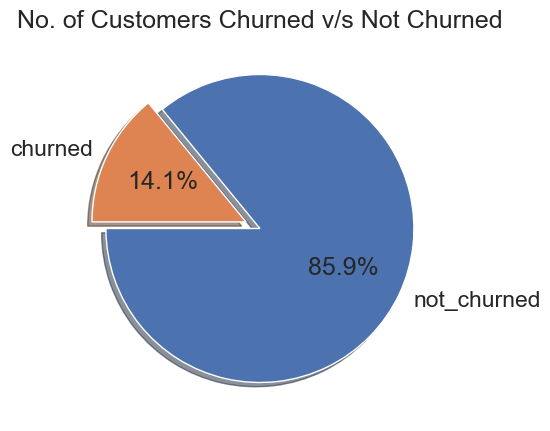

In [ ]:
# Checking the Imbalance in Data
not_churned = data[data['churn']=='no']['churn'].count()
churned = data[data['churn']=='yes']['churn'].count()

fig = plt.figure(figsize=(5,5)) 
plt.pie([not_churned,churned], labels=['not_churned','churned'],explode=(0,0.1),\
        shadow=True, autopct="%1.1f%%", startangle=180)
plt.title('No. of Customers Churned v/s Not Churned')
plt.show()

<b> Observation: </b>
- Existe un desequilibrio significativo entre las dos clases de datos.
- Solo el 14,1 % del total de muestras pertenecen a la clase churned.

### 3.2) Distributions for various features to understand the seperation between classes for that feature.

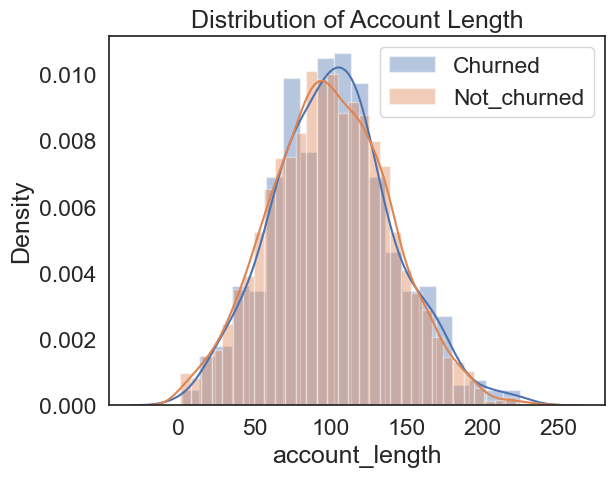

In [298]:
# Plotting PDF of account length for both the class labels
ac_len_churned = data[data['churn']=='yes']['account_length']
ac_len_not_churned =data[data['churn']=='no']['account_length']
sns.distplot(ac_len_churned,label='Churned')
sns.distplot(ac_len_not_churned,label='Not_churned')
plt.title('Distribution of Account Length')
plt.legend()
plt.show()

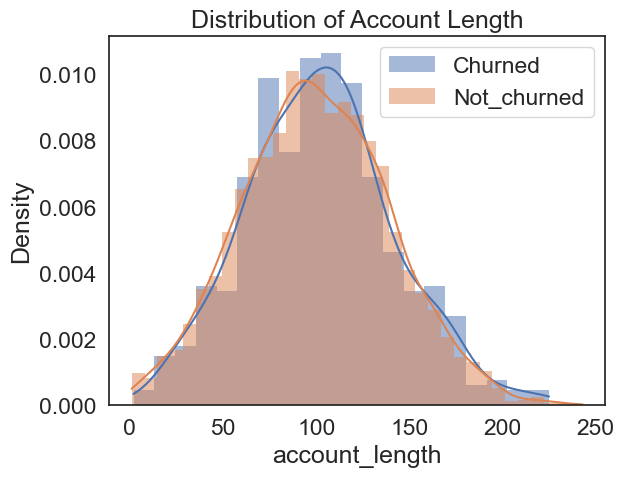

In [299]:
# Plotting PDF of account length for both the class labels
ac_len_churned = data[data['churn']=='yes']['account_length']
ac_len_not_churned =data[data['churn']=='no']['account_length']
sns.histplot(ac_len_churned,label='Churned', kde=True, stat="density",edgecolor='none')
sns.histplot(ac_len_not_churned,label='Not_churned', kde=True, stat="density",edgecolor='none')
plt.title('Distribution of Account Length')
plt.legend()
plt.show()




<b> Observation: </b>
- La distribución de account_length para los Churned y la distribución de account_length para los Not_churned casi se superponen.

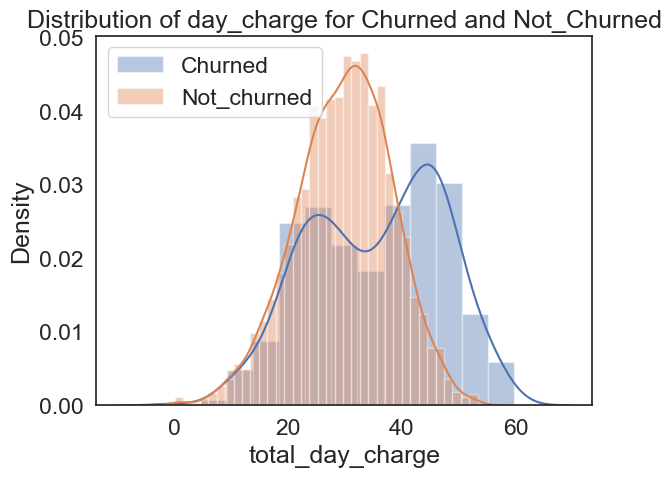

In [ ]:
# Plotting PDF of day charge for both the class labels
day_charge_churned = data[data['churn']=='yes']['total_day_charge']
day_charge_not_churned =data[data['churn']=='no']['total_day_charge']
sns.distplot(day_charge_churned,label='Churned')
sns.distplot(day_charge_not_churned,label='Not_churned')
plt.title('Distribution of day_charge for Churned and Not_Churned')
plt.legend()
plt.show()

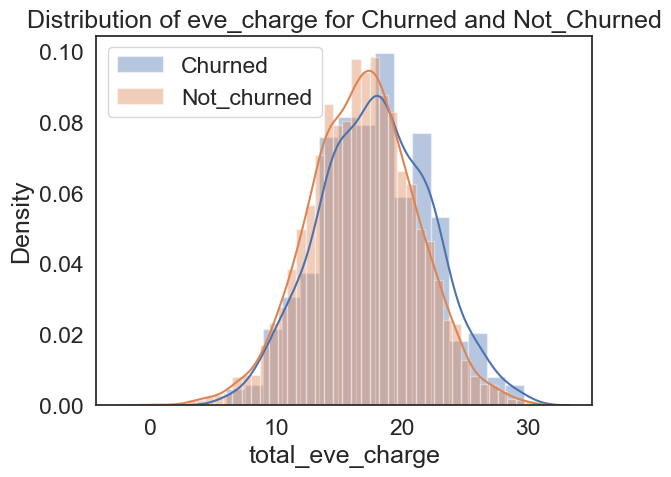

In [301]:
# Plotting PDF of eve_charge for both the class labels
eve_charge_churned = data[data['churn']=='yes']['total_eve_charge']
eve_charge_not_churned =data[data['churn']=='no']['total_eve_charge']
sns.distplot(eve_charge_churned,label='Churned')
sns.distplot(eve_charge_not_churned,label='Not_churned')
plt.title('Distribution of eve_charge for Churned and Not_Churned')
plt.legend()
plt.show()

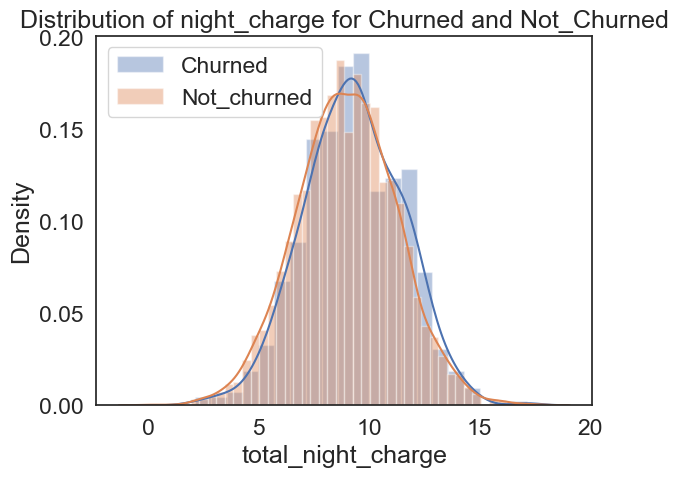

In [302]:
# Plotting PDF of night_charge for both the class labels
night_charge_churned = data[data['churn']=='yes']['total_night_charge']
night_charge_not_churned =data[data['churn']=='no']['total_night_charge']
sns.distplot(night_charge_churned,label='Churned')
sns.distplot(night_charge_not_churned,label='Not_churned')
plt.title('Distribution of night_charge for Churned and Not_Churned')
plt.legend()
plt.show()

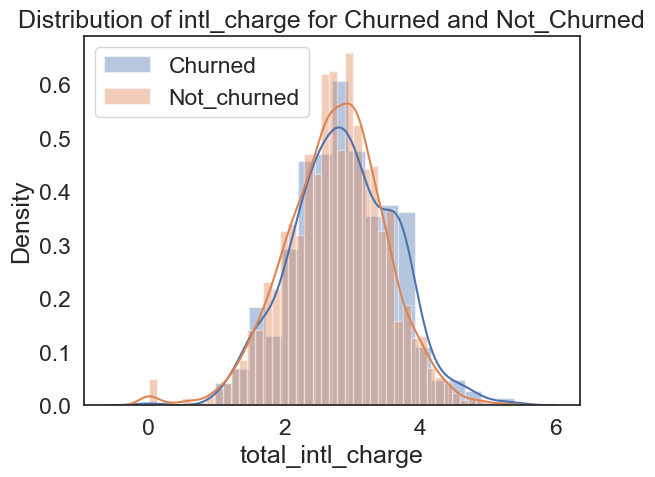

In [303]:
# Plotting PDF of intl_charge for both the class labels
intl_charge_churned = data[data['churn']=='yes']['total_intl_charge']
intl_charge_not_churned =data[data['churn']=='no']['total_intl_charge']
sns.distplot(intl_charge_churned,label='Churned')
sns.distplot(intl_charge_not_churned,label='Not_churned')
plt.title('Distribution of intl_charge for Churned and Not_Churned')
plt.legend()
plt.show()

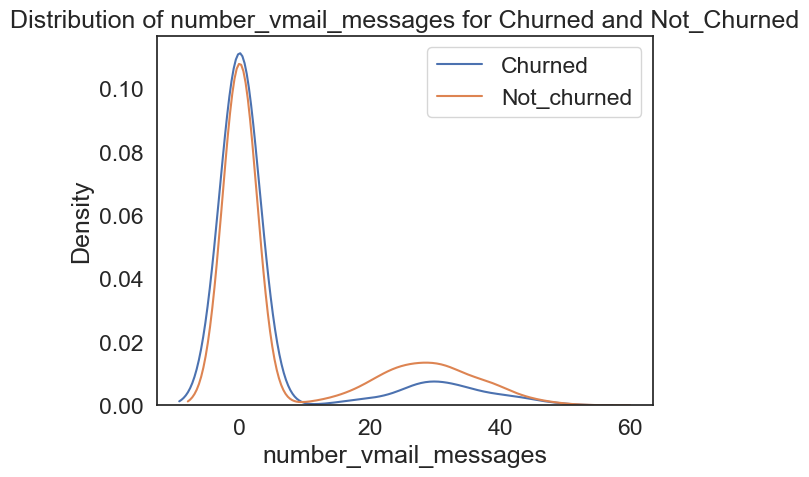

In [304]:
# Plotting PDF of no_vmail_charge for both the class labels
vmail_msgs_churned = data[data['churn']=='yes']['number_vmail_messages']
vmail_msgs_not_churned =data[data['churn']=='no']['number_vmail_messages']
sns.distplot(vmail_msgs_churned,hist=False,label='Churned')
sns.distplot(vmail_msgs_not_churned,hist=False,label='Not_churned')
plt.title('Distribution of number_vmail_messages for Churned and Not_Churned')
plt.legend()
plt.show()

### 3.3) Correlation Matrix:

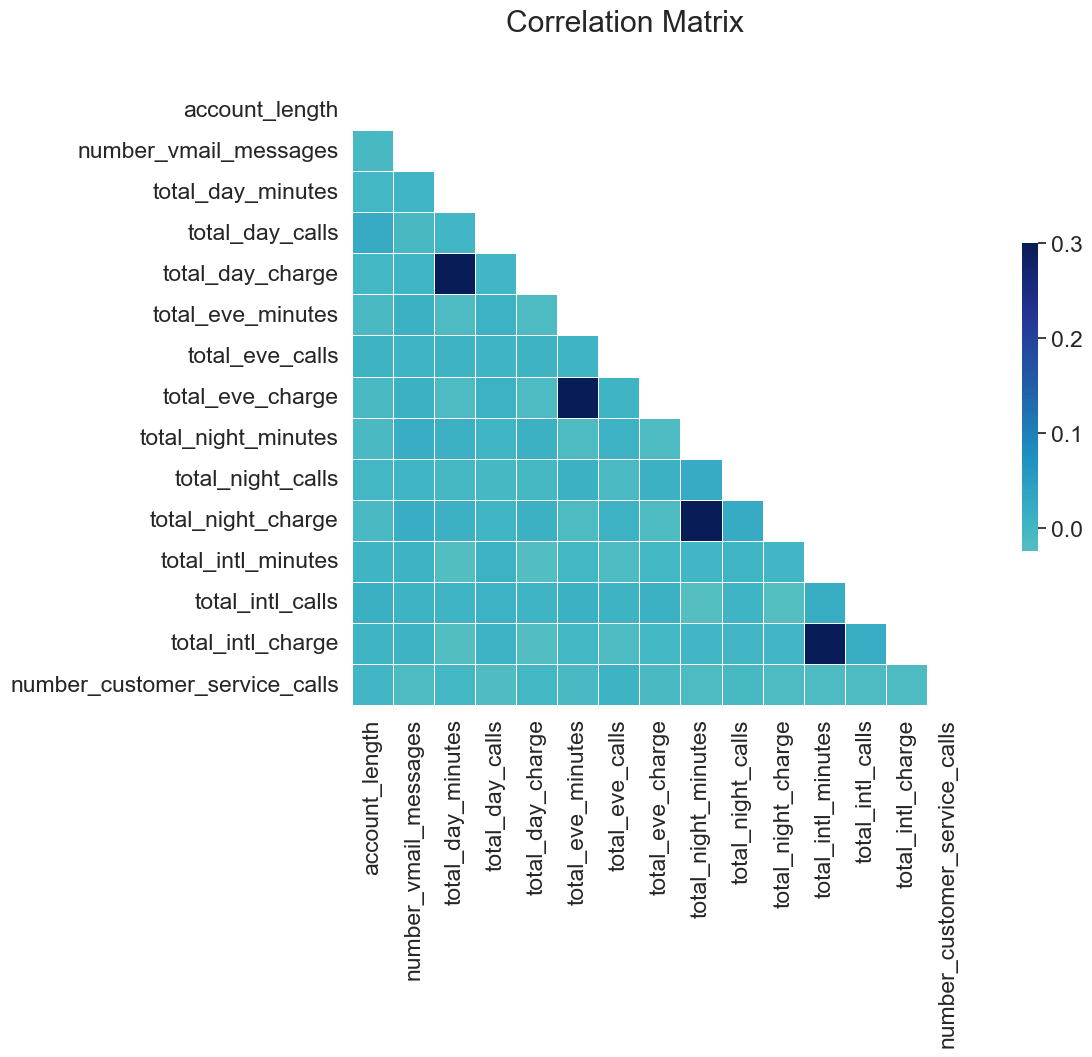

In [305]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtramos solo las columnas numéricas
corr = data.select_dtypes(include=[np.number]).corr()

# Crear la máscara para el gráfico
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True  # Eliminar la parte superior de la matriz

# Graficar el heatmap
sns.set_theme(style="white", font_scale=1.5)
f, ax = plt.subplots(figsize=(14, 8))
f.suptitle('Correlation Matrix')

sns.heatmap(corr, mask=mask, cmap='YlGnBu', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

<b> Observation </b>
<n> Highly correlated feature pairs:
    - total_day_minutes, total_day_charge
    - total_eve_minutes, total_eve_charge
    - total_night_minutes, total_night_charge
    - total_intl_minutes, total_intl_charge


In [306]:
# Removing  the highly correlated features
data = data.drop(['total_day_minutes','total_eve_minutes','total_night_minutes','total_intl_minutes'], axis=1)

## 4.) Train test split

In [307]:
# change the yes, No values in target column to zeros and ones.
data.churn.replace(['yes','no'],[1,0],inplace=True)

In [308]:
# Seperate the target variable from training features
Y = data['churn']
X = data.drop('churn', axis=1)

In [309]:
# split the whole data into two sets - train and test
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.10,stratify=Y,random_state=11)

In [310]:
print('Shape of x_train and y_train: ',x_train.shape, y_train.shape)

Shape of x_train and y_train:  (3825, 15) (3825,)


In [311]:
print('Shape of x_test and y_test: ',x_test.shape, y_test.shape)

Shape of x_test and y_test:  (425, 15) (425,)


## 5.) Featurisation 

### 5.1) State

In [312]:
# Featurise the categorical feature State 
# Initiate countvectorizer and transform the state feature into a numerical feature
# Perform fit_transform seperately on train and teat
vectorizer = CountVectorizer()
train_state = vectorizer.fit_transform(x_train['state'].values)
test_state = vectorizer.fit_transform(x_test['state'].values)

In [313]:
# save the feaure names in a list for later use
state_fea = vectorizer.get_feature_names_out()
print("Feature names: ", state_fea)

Feature names:  ['ak' 'al' 'ar' 'az' 'ca' 'co' 'ct' 'dc' 'de' 'fl' 'ga' 'hi' 'ia' 'id'
 'il' 'in' 'ks' 'ky' 'la' 'ma' 'md' 'me' 'mi' 'mn' 'mo' 'ms' 'mt' 'nc'
 'nd' 'ne' 'nh' 'nj' 'nm' 'nv' 'ny' 'oh' 'ok' 'or' 'pa' 'ri' 'sc' 'sd'
 'tn' 'tx' 'ut' 'va' 'vt' 'wa' 'wi' 'wv' 'wy']


In [314]:
print("Shape of the new state feature: ",train_state.shape)

Shape of the new state feature:  (3825, 51)


### 5.2) Area Code

In [315]:
# Featurise the categorical feature Area Code
vectorizer = CountVectorizer()
train_area_code = vectorizer.fit_transform(x_train['area_code'].values) 
test_area_code = vectorizer.fit_transform(x_test['area_code'].values)

In [316]:
# save the feaure names in a list for later use
area_code_fea = vectorizer.get_feature_names_out()
print("feature names: ",area_code_fea)

feature names:  ['area_code_408' 'area_code_415' 'area_code_510']


In [317]:
print("Shape of the new Area Code feature: ",train_area_code.shape)

Shape of the new Area Code feature:  (3825, 3)


### 5.3) International_plan

In [318]:
# Featurise the categorical feature international_plan
vectorizer = CountVectorizer()
train_international_plan = vectorizer.fit_transform(x_train['international_plan'].values)
test_international_plan = vectorizer.fit_transform(x_test['international_plan'].values)
print(vectorizer.get_feature_names_out())

['no' 'yes']


In [319]:
# save the feaure names in a list for later use
intnl_fea = ['intl_plan_no','intl_plan_yes']
print("feature names: ",intnl_fea)

feature names:  ['intl_plan_no', 'intl_plan_yes']


In [320]:
print("Shape of the new internationa_plan feature: ",train_international_plan.shape)

Shape of the new internationa_plan feature:  (3825, 2)


### 5.4) voice_mail_plan

In [321]:
# Featurise the categorical feature voice_mail_plan
vectorizer = CountVectorizer()
train_voice_mail_plan = vectorizer.fit_transform(x_train['voice_mail_plan'].values) 
test_voice_mail_plan = vectorizer.fit_transform(x_test['voice_mail_plan'].values) 
print(vectorizer.get_feature_names_out())

['no' 'yes']


In [322]:
# save the feaure names in a list for later use
voice_mail_plan_fea = ['voice_plan_no','voice_plan_yes']
print("feature names: ",voice_mail_plan_fea)

feature names:  ['voice_plan_no', 'voice_plan_yes']


In [323]:
print("Shape of the new Area Code feature: ",train_voice_mail_plan.shape)

Shape of the new Area Code feature:  (3825, 2)


### 5.5) Numerical features

In [324]:
numerical_columns = data.select_dtypes(include=['number'])
print(numerical_columns.columns)

Index(['account_length', 'number_vmail_messages', 'total_day_calls',
       'total_day_charge', 'total_eve_calls', 'total_eve_charge',
       'total_night_calls', 'total_night_charge', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls', 'churn'],
      dtype='object')


In [325]:
# collect the numerical features seperately
numerical_fea = ['account_length','number_vmail_messages','total_day_calls',\
                 'total_day_charge', 'total_eve_calls', 'total_eve_charge', \
                 'total_night_calls', 'total_night_charge', 'total_intl_calls', \
                 'total_intl_charge', 'number_customer_service_calls']
train_numerical = x_train[numerical_fea]
test_numerical = x_test[numerical_fea]

In [326]:
# Scaling the numerical data using sklearn's Standard scaler
scaler = StandardScaler()
train_numerical_scaled = scaler.fit_transform(train_numerical)
test_numerical_scaled = scaler.fit_transform(test_numerical)

In [327]:
print("shape of the standardised train data numerical features: ",train_numerical_scaled.shape)
print("shape of the standardised test data numerical features: ",test_numerical_scaled.shape)

shape of the standardised train data numerical features:  (3825, 11)
shape of the standardised test data numerical features:  (425, 11)


### 5.6) Merge Features

In [337]:
# Merge all the features together - vectorized categorical features and standardised numerical features.
x_train_merged = hstack((train_numerical_scaled,train_voice_mail_plan,train_international_plan,\
                       train_area_code,train_state))

x_test_merged = hstack((test_numerical_scaled,test_voice_mail_plan,test_international_plan,\
                       test_area_code,test_state))

In [338]:
print("Shape of the final training data: ",x_train_merged.shape)
print("Shape of the final test data: ",x_test_merged.shape)

Shape of the final training data:  (3825, 69)
Shape of the final test data:  (425, 69)


In [354]:
from scipy.sparse import save_npz

# Guardar la matriz dispersa en un archivo .npz
save_npz('x_test_merged.npz', x_test_merged)

In [332]:
all_features = numerical_fea.copy()
all_features.extend(voice_mail_plan_fea)
all_features.extend(intnl_fea)
all_features.extend(area_code_fea)
all_features.extend(state_fea)


In [333]:
all_features

['account_length',
 'number_vmail_messages',
 'total_day_calls',
 'total_day_charge',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_calls',
 'total_night_charge',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls',
 'voice_plan_no',
 'voice_plan_yes',
 'intl_plan_no',
 'intl_plan_yes',
 'area_code_408',
 'area_code_415',
 'area_code_510',
 'ak',
 'al',
 'ar',
 'az',
 'ca',
 'co',
 'ct',
 'dc',
 'de',
 'fl',
 'ga',
 'hi',
 'ia',
 'id',
 'il',
 'in',
 'ks',
 'ky',
 'la',
 'ma',
 'md',
 'me',
 'mi',
 'mn',
 'mo',
 'ms',
 'mt',
 'nc',
 'nd',
 'ne',
 'nh',
 'nj',
 'nm',
 'nv',
 'ny',
 'oh',
 'ok',
 'or',
 'pa',
 'ri',
 'sc',
 'sd',
 'tn',
 'tx',
 'ut',
 'va',
 'vt',
 'wa',
 'wi',
 'wv',
 'wy']

## 6. Models

### 6.1) SVM Without Class Balancing

Fitting 5 folds for each of 6 candidates, totalling 30 fits


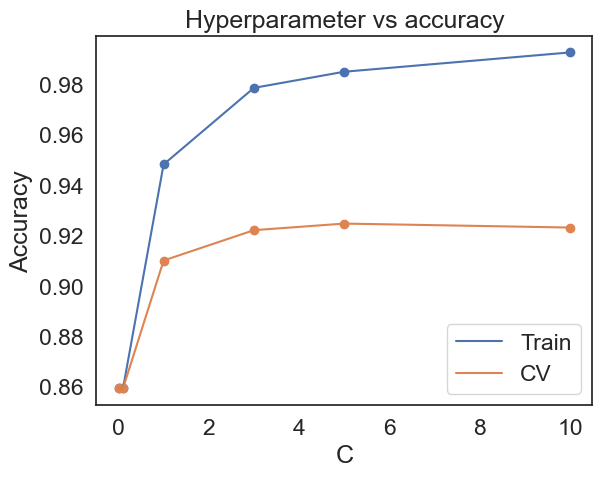

In [119]:
# Creating a model without balancing to create a benchmark
# perform Grid Search To Get Best Hyperparameters
parameters = {'C':[0.01,0.1,1,3,5,10]}
svm_clf = SVC(random_state=43)
grid = GridSearchCV(estimator=svm_clf, param_grid=parameters,scoring='accuracy',return_train_score=True,verbose=1)
grid.fit(x_train_merged,y_train)

cv_result = pd.DataFrame(grid.cv_results_)
plt.scatter(cv_result['param_C'],cv_result['mean_train_score'])
plt.plot(cv_result['param_C'],cv_result['mean_train_score'],label='Train')
plt.scatter(cv_result['param_C'],cv_result['mean_test_score'])
plt.plot(cv_result['param_C'],cv_result['mean_test_score'],label="CV")
plt.title('Hyperparameter vs accuracy')
plt.legend()
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()

In [57]:
# Best parameter chosen manually by observation that gives the best bias variance trade off
best_parameter = 3
print("Best value of C: ", best_parameter)

Best value of C:  3


In [58]:
# Training the model again using the optimal parameters discovered
svm_clf = SVC(C=best_parameter,random_state=43)
svm_clf.fit(x_train_merged,y_train)

result1 = ["1.","SVM","No class balancing"]
y_pred_tr = svm_clf.predict(x_train_merged)
result1.append(round(accuracy_score(y_train,y_pred_tr),2))
print('Train accuracy SVM: ',result1[3])

y_pred_test = svm_clf.predict(x_test_merged)
result1.append(round(accuracy_score(y_test,y_pred_test),2))
print('Test accuracy SVM: ',result1[4])

recall = recall_score(y_test,y_pred_test)
result1.append(round(recall,2))
print("Recall Score: ",result1[5])

Train accuracy SVM:  0.98
Test accuracy SVM:  0.91
Recall Score:  0.48


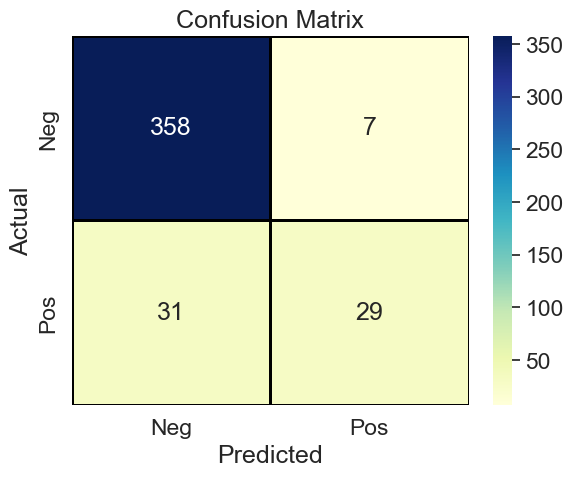

In [59]:
# Show the confusion matrix
cm = confusion_matrix(y_test,y_pred_test)
ax=plt.subplot();
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='YlGnBu',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()

<b> Observations: </b> 
- Train and test accuracy is High. But since data is imbalanced accuracy is correctly representing only the not_churned class.
- The Recall is less than 0.5 which is not a good sign. 
- Number of False negatives is higher than True Positives. 
- Model is performing poorly on churned class.

### 6.2) SVM - Class balanced using class weights

Fitting 5 folds for each of 6 candidates, totalling 30 fits


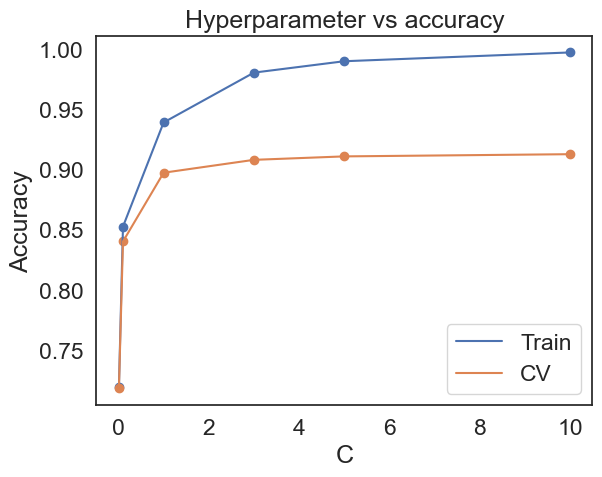

In [60]:
# Grid Search To Get Best Hyperparameters
parameters = {'C':[0.01,0.1,1,3,5,10]}
svm_clf = SVC(class_weight='balanced',random_state=43)
grid = GridSearchCV(estimator=svm_clf, param_grid=parameters,scoring='accuracy',return_train_score=True,verbose=1)
grid.fit(x_train_merged,y_train)

cv_result = pd.DataFrame(grid.cv_results_)
plt.scatter(cv_result['param_C'],cv_result['mean_train_score'])
plt.plot(cv_result['param_C'],cv_result['mean_train_score'],label='Train')
plt.scatter(cv_result['param_C'],cv_result['mean_test_score'])
plt.plot(cv_result['param_C'],cv_result['mean_test_score'],label="CV")
plt.title('Hyperparameter vs accuracy')
plt.legend()
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()

In [61]:
# Best parameter chosen manually by observation that gives the best bias variance trade off
best_parameter = 3
print("Best value of C: ", best_parameter)

Best value of C:  3


In [62]:
# Training the model again using the optimal parameters discovered
svm_clf = SVC(C=best_parameter,class_weight='balanced',random_state=43)
svm_clf.fit(x_train_merged,y_train)

result2 = ["2.","SVM","Balanced using class weights"]
y_pred_tr = svm_clf.predict(x_train_merged)
result2.append(round(accuracy_score(y_train,y_pred_tr),2))
print('Train accuracy SVM: ',result2[3])

y_pred_test = svm_clf.predict(x_test_merged)
result2.append(round(accuracy_score(y_test,y_pred_test),2))
print('Test accuracy SVM: ',result2[4])

recall = recall_score(y_test,y_pred_test)
result2.append(round(recall,2))
print("Recall Score: ",result2[5])

Train accuracy SVM:  0.98
Test accuracy SVM:  0.9
Recall Score:  0.65


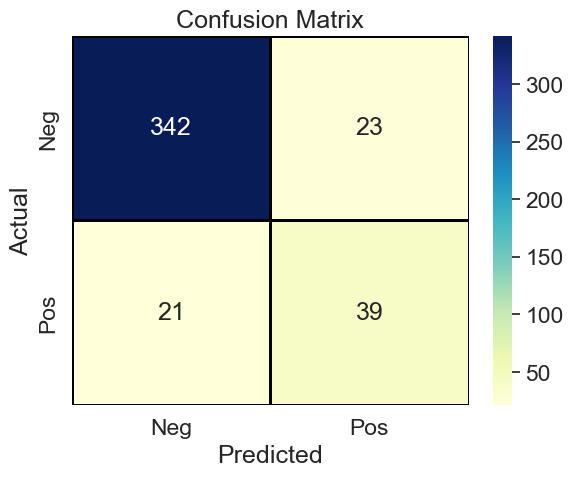

In [63]:
cm = confusion_matrix(y_test,y_pred_test)
ax=plt.subplot();
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='YlGnBu',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()

<b> Observations: </b> 
- Train and test accuracy is High.
- The Recall has improved after balancing class weights in svm. 
- But the Model is still performing poorly on churned class.

### 6.3)  Random Forest Classifier 

Fitting 5 folds for each of 20 candidates, totalling 100 fits
----------------------------------------------------------------------------------------------------


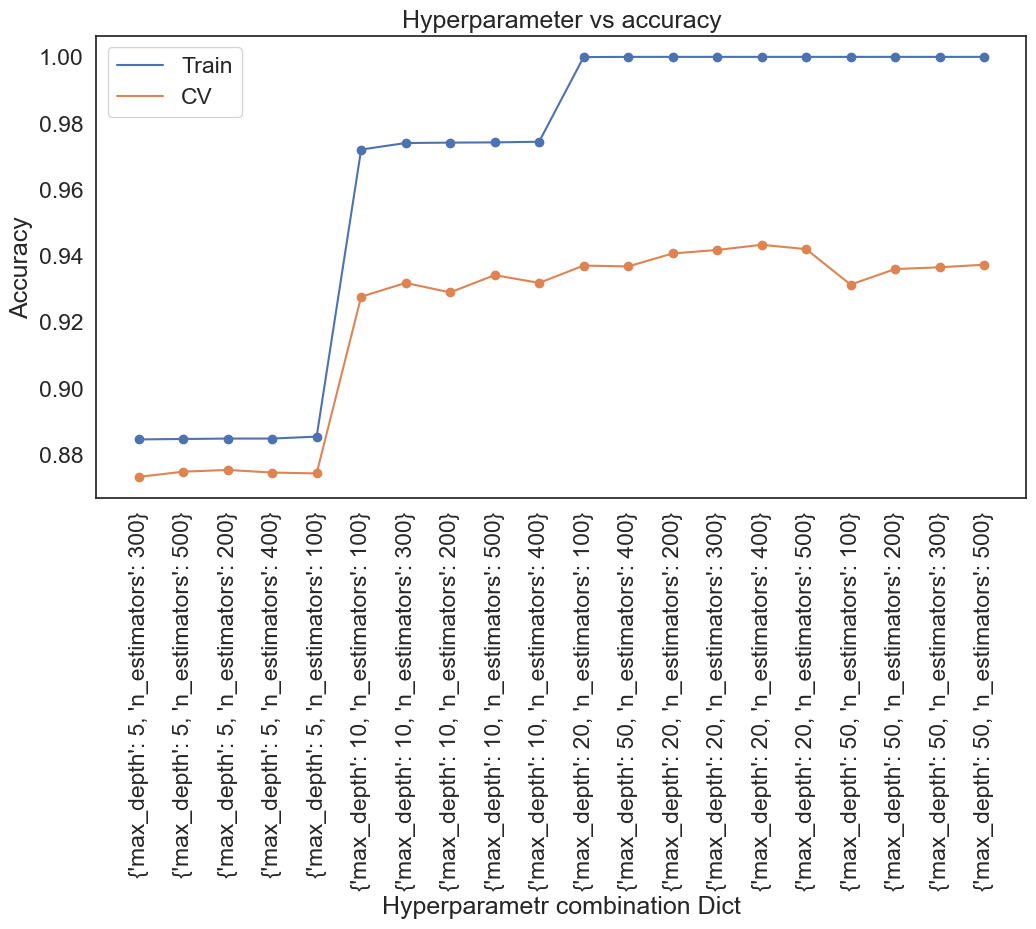

In [64]:
# Grid Search To Get Best Hyperparameters
parameters = {'max_depth':[5,10,20,50], 'n_estimators': [100,200,300,400,500]}
clf_rf = RandomForestClassifier(class_weight='balanced', random_state=43)      
grid = GridSearchCV(estimator=clf_rf, param_grid=parameters,scoring='accuracy',return_train_score=True,verbose=1)
grid.fit(x_train_merged,y_train)

print("-----"*20)
cv_result = pd.DataFrame(grid.cv_results_).sort_values(by='mean_train_score',ascending=True)
params = list(cv_result['params'].astype(str))

plt.figure(figsize=(12,6))
plt.scatter(params,cv_result['mean_train_score'])
plt.plot(params,cv_result['mean_train_score'],label='Train')
plt.scatter(params,cv_result['mean_test_score'])
plt.plot(params,cv_result['mean_test_score'],label="CV")
plt.title('Hyperparameter vs accuracy')
plt.legend()
plt.xlabel('Hyperparametr combination Dict')
plt.xticks(rotation=90)
plt.ylabel('Accuracy')
plt.show()

In [65]:
# Best parameter chosen manually by observation that gives the best bias variance trade off
best_max_depth = 10
best_n_estimator = 300

In [66]:
# Training the model again using the optimal parameters discovered
clf_rf = RandomForestClassifier(max_depth=best_max_depth,n_estimators=best_n_estimator,\
                                class_weight='balanced', random_state=43)
clf_rf.fit(x_train_merged,y_train)

result3 = ["3.","RF","Balanced using class weights"]
y_pred_tr = clf_rf.predict(x_train_merged)
result3.append(round(accuracy_score(y_train,y_pred_tr),2))
print('Train accuracy RF: ',result3[3])

y_pred_test = clf_rf.predict(x_test_merged)
result3.append(round(accuracy_score(y_test,y_pred_test),2))
print('Test accuracy RF: ',result3[4])

recall = recall_score(y_test,y_pred_test)
result3.append(round(recall,2))
print("Recall Score: ",result3[5])

Train accuracy RF:  0.97
Test accuracy RF:  0.91
Recall Score:  0.72


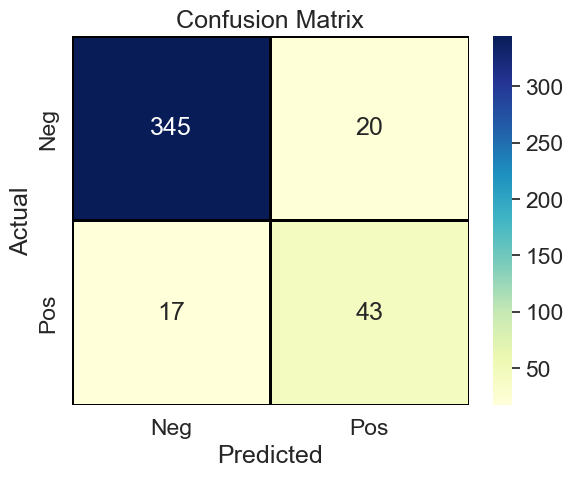

In [67]:
cm = confusion_matrix(y_test,y_pred_test)
ax=plt.subplot();
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='YlGnBu',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()

<b> Observations: </b> 
- False negatives has reduced below one third of the total actual positives.
- Test accuracy has increased to 92%. 
- Recall has improved to 72%.

### Feature importance

In [68]:
# Get feature importance from random forrest classifier
importance = clf_rf.feature_importances_
fea_imp_df = pd.DataFrame({"allfeatures": all_features,"importance": list(importance)})
fea_imp_df.sort_values('importance',inplace=True)

<Axes: ylabel='allfeatures'>

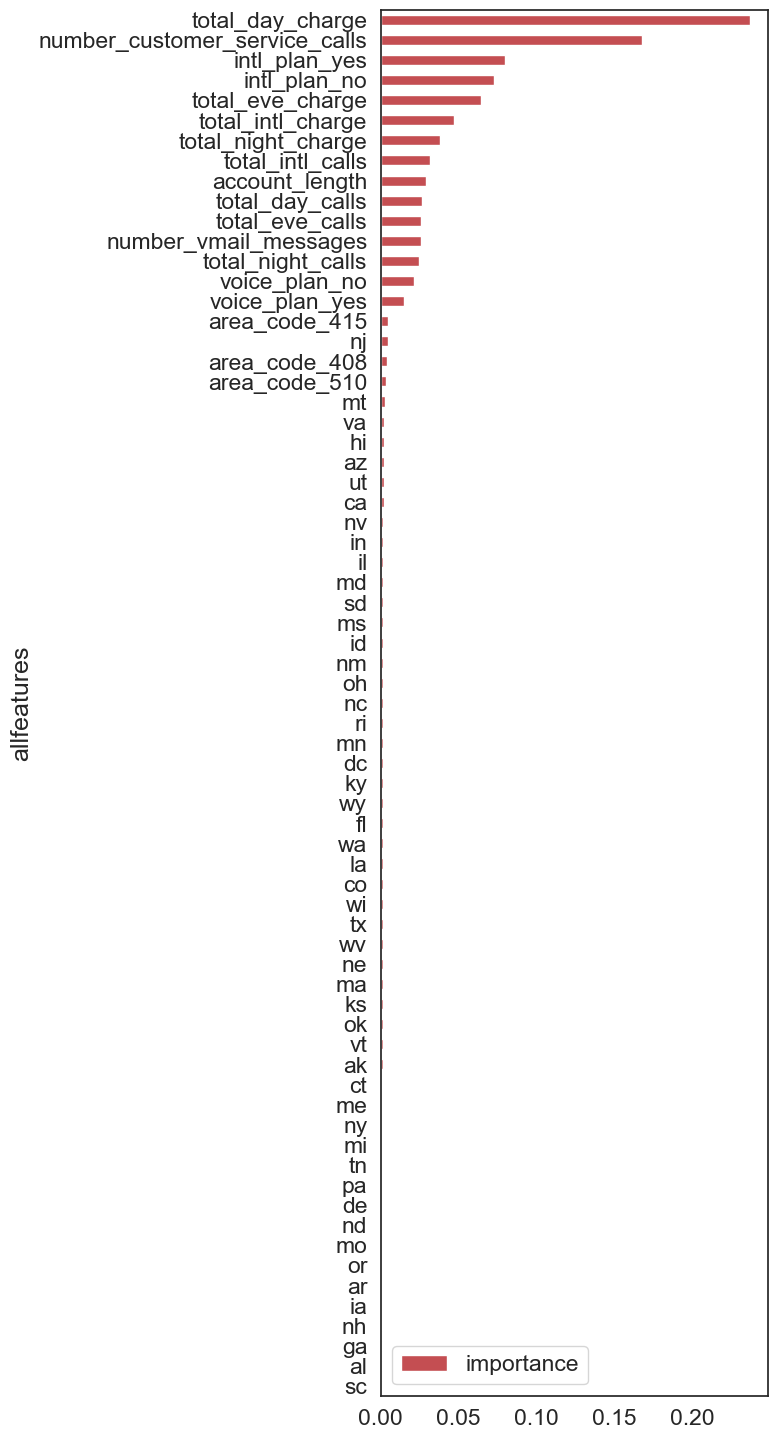

In [69]:
#fig = plt.figure(figsize=(5,18))
fea_imp_df.plot(kind='barh',y='importance',x='allfeatures',color='r',figsize=(5,18))

<b> Observations: </b> 
- Total day charge and number of customer service calls are the most important features

### 6.4) XgBoost Classifier

In [70]:
# create scale_pos_weight parameter used for class balancing in XgBoost
import math
scale=round(math.sqrt(y_train.value_counts()[0]/y_train.value_counts()[1]),2)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
----------------------------------------------------------------------------------------------------


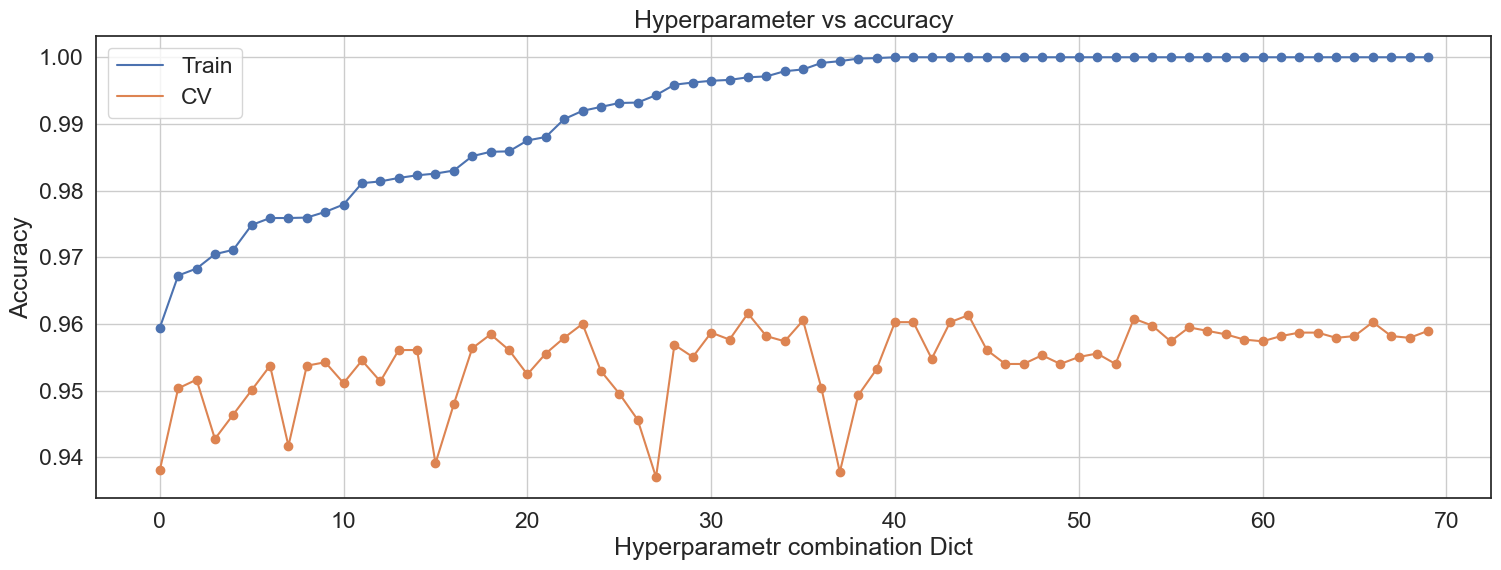

In [71]:
# Grid Search To Get Best Hyperparameters
parameters = {"learning_rate"    : [0.10,0.20,0.30 ],\
              "max_depth"        : [ 3,5,10,20],\
              "n_estimators" : [ 100, 200, 300, 500],\
              "colsample_bytree" : [ 0.3, 0.5, 0.7 ] }
clf_xgb = XGBClassifier(scale_pos_weight=scale, eval_metric='mlogloss')
grid = GridSearchCV(estimator=clf_xgb, param_grid=parameters,scoring='accuracy',return_train_score=True,verbose=1)
grid.fit(x_train_merged,y_train)

print("-----"*20)
# plotting only the first 70 train scores
cv_result = pd.DataFrame(grid.cv_results_).sort_values(by='mean_train_score',ascending=True)[:70]
param_list = list(cv_result['params'])
param_index = np.arange(70)
plt.figure(figsize=(18,6))
plt.scatter(param_index,cv_result['mean_train_score'])
plt.plot(param_index,cv_result['mean_train_score'],label='Train')
plt.scatter(param_index,cv_result['mean_test_score'])
plt.plot(param_index,cv_result['mean_test_score'],label="CV")
plt.title('Hyperparameter vs accuracy')
plt.grid()
plt.legend()
plt.xlabel('Hyperparametr combination Dict')
plt.ylabel('Accuracy')
plt.show()

In [72]:
# Best parameter chosen manually by observation that gives the best bias variance trade off
best_parameters = param_list[34]
print(best_parameters)

{'colsample_bytree': 0.5, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}


In [73]:
# Training the model again using the optimal parameters discovered
clf_xgb = XGBClassifier(learning_rate=best_parameters['learning_rate'],max_depth=best_parameters['max_depth'],\
                        n_estimators=best_parameters['n_estimators'], colsample_bytree=best_parameters['colsample_bytree'],\
                        eval_metric='mlogloss',scale_pos_weight=scale)
clf_xgb.fit(x_train_merged,y_train)

result4 = ["4.","XGBClassifier","Balanced using scale_pos_weight"]
y_pred_tr = clf_xgb.predict(x_train_merged)
result4.append(round(accuracy_score(y_train,y_pred_tr),2))
print('Train accuracy XGB: ',result4[3])

y_pred_test = clf_xgb.predict(x_test_merged)
result4.append(round(accuracy_score(y_test,y_pred_test),2))
print('Test accuracy XGB: ',result4[4])

recall = recall_score(y_test,y_pred_test)
result4.append(round(recall,2))
print("Recall Score: ",result4[5])

Train accuracy XGB:  1.0
Test accuracy XGB:  0.95
Recall Score:  0.72


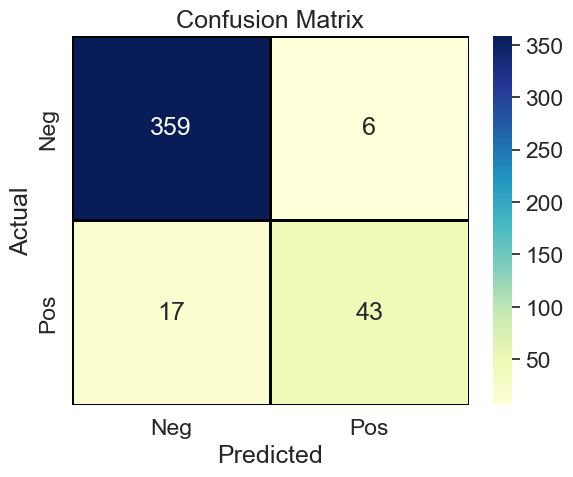

In [74]:
# Visualise confusion matrix
cm = confusion_matrix(y_test,y_pred_test)
ax=plt.subplot();
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='YlGnBu',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()

<b> Observations: </b> 
- XgBoost with scale_pos_weight is the best performing model till now with 75% recall and 95% test accuracy.
- Model could do much better if we can collect more data on the churned class.

### 6.5) XGBClassifier on Data Balanced using SMOTE

In [40]:
#Synthetic oversampling of minority class with smote
print("count of the classes before oversampling: ",dict(y_train.value_counts()))
sm = SMOTE(sampling_strategy ='minority')
x_train_sm,y_train_sm = sm.fit_resample(x_train_merged,y_train)
print("count of the classes after oversampling: ",dict(y_train_sm.value_counts()))

count of the classes before oversampling:  {0: 3287, 1: 538}
count of the classes after oversampling:  {1: 3287, 0: 3287}


Fitting 5 folds for each of 144 candidates, totalling 720 fits
----------------------------------------------------------------------------------------------------


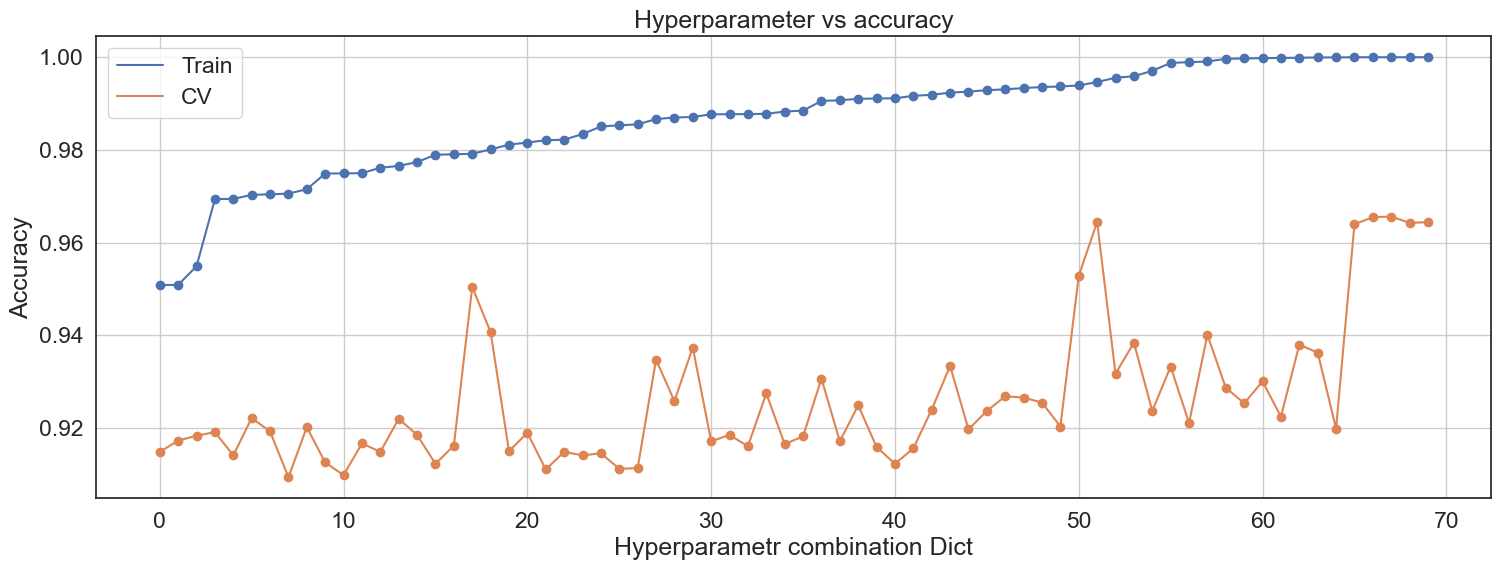

In [41]:
# Grid Search To Get Best Hyperparameters
parameters = {"learning_rate"    : [0.10,0.20,0.30 ],\
              "max_depth"        : [ 3,5,10,20],\
              "n_estimators" : [ 100, 200, 300, 500],\
              "colsample_bytree" : [ 0.3, 0.5, 0.7 ] }
clf_xgb = XGBClassifier(eval_metric='mlogloss')
grid = GridSearchCV(estimator=clf_xgb, param_grid=parameters,scoring='accuracy',return_train_score=True,verbose=1)
grid.fit(x_train_sm,y_train_sm)

print("-----"*20)
cv_result = pd.DataFrame(grid.cv_results_).sort_values(by='mean_train_score',ascending=True)[:70]
param_list = list(cv_result['params'])
param_index = np.arange(70)
plt.figure(figsize=(18,6))
plt.scatter(param_index,cv_result['mean_train_score'])
plt.plot(param_index,cv_result['mean_train_score'],label='Train')
plt.scatter(param_index,cv_result['mean_test_score'])
plt.plot(param_index,cv_result['mean_test_score'],label="CV")
plt.title('Hyperparameter vs accuracy')
plt.grid()
plt.legend()
plt.xlabel('Hyperparametr combination Dict')
plt.ylabel('Accuracy')
plt.show()

In [342]:
# Best parameter chosen manually by observation that gives the best bias variance trade off
best_parameters = param_list[51]
print(best_parameters)

{'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}


In [343]:
# Training the model again using the optimal parameters discovered
clf_xgb = XGBClassifier(learning_rate=best_parameters['learning_rate'],max_depth=best_parameters['max_depth'],\
                        n_estimators=best_parameters['n_estimators'], colsample_bytree=best_parameters['colsample_bytree'],\
                        eval_metric='mlogloss')
clf_xgb.fit(x_train_sm,y_train_sm)

result5 = ["5.","XGBClassifier","Balanced using SMOTE"]
y_pred_tr = clf_xgb.predict(x_train_sm)
result5.append(round(accuracy_score(y_train_sm,y_pred_tr),2))
print('Train accuracy XGB: ',result5[3])

y_pred_test = clf_xgb.predict(x_test_merged)
result5.append(round(accuracy_score(y_test,y_pred_test),2))
print('Test accuracy XGB: ',result5[4])

recall = recall_score(y_test,y_pred_test)
result5.append(round(recall,2))
print("Recall Score: ",result5[5])

Train accuracy XGB:  0.99
Test accuracy XGB:  0.84
Recall Score:  0.85


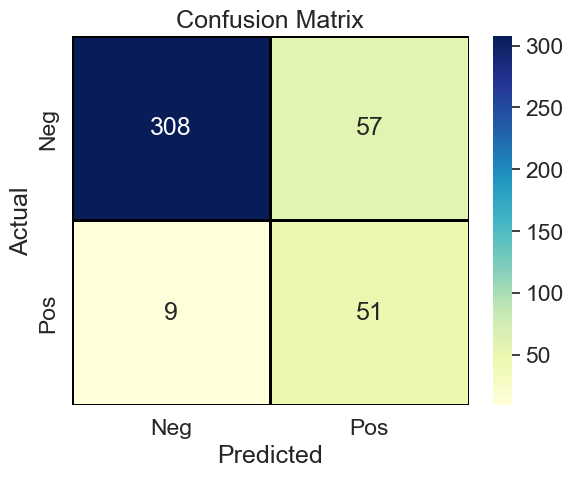

In [344]:
# Visualise confusion matrix
cm = confusion_matrix(y_test,y_pred_test)
ax=plt.subplot();
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='YlGnBu',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()

In [45]:
import joblib

In [46]:
joblib.dump(clf_xgb, 'best_xgb_model.pkl')

['best_xgb_model.pkl']

# Conclusion:

In [80]:
Result_table = PrettyTable(["S.No.","Model","class imbalance status","Train_accuracy","Test_Accuracy","Test_Recall_score"])
Result_table.add_row(result1)
Result_table.add_row(result2)
Result_table.add_row(result3)
Result_table.add_row(result4)
Result_table.add_row(result5)
print(Result_table)

+-------+---------------+---------------------------------+----------------+---------------+-------------------+
| S.No. |     Model     |      class imbalance status     | Train_accuracy | Test_Accuracy | Test_Recall_score |
+-------+---------------+---------------------------------+----------------+---------------+-------------------+
|   1.  |      SVM      |        No class balancing       |      0.98      |      0.91     |        0.48       |
|   2.  |      SVM      |   Balanced using class weights  |      0.98      |      0.9      |        0.65       |
|   3.  |       RF      |   Balanced using class weights  |      0.97      |      0.91     |        0.72       |
|   4.  | XGBClassifier | Balanced using scale_pos_weight |      1.0       |      0.95     |        0.72       |
|   5.  | XGBClassifier |       Balanced using SMOTE      |      0.99      |      0.84     |        0.85       |
+-------+---------------+---------------------------------+----------------+---------------+----

- Test recall score is highest for XGBClassifier when data is balanced using SMOTE, but it's leading to low accuracy because model is performing poorly on majority class.
- XGBClassifier is giving the highest test accuracy and a decent recall score when data is balanced in the classifier using scale_pos_weight parameter.
- The challange is reducing the class imbalance while simultaneously getting a high recall score without overfitting. It's achievable by acquiring a larger dataset and doing a more rigorous hyperparameter tuning for the classifier.

In [346]:
loaded_model = joblib.load('best_xgb_model.pkl')

In [361]:
from scipy.sparse import load_npz

x_test_merged_loaded = load_npz('x_test_merged.npz')

In [362]:
y_pred = loaded_model.predict(x_test_merged_loaded)

In [363]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,